In [23]:
import os
import sys

sys.path.append(os.path.join('..'))
from models import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dataset rings5-regular

In [24]:
def train_initialy(model):
    model.train(epochs=1000, batch=True, learning_rate=0.01, save_till_best=True)

def train_model(model):
    model.train(epochs=1000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=2000, batch=True, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.99, save_till_best=True)
    model.train(epochs=2000, batch=True, batch_size=100, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=24, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)
    model.train(epochs=1000, batch=True, batch_size=10, learning_rate=0.001, optimizer="rmsprop", rms_beta=0.9999, save_till_best=True)

In [25]:
dataset_name = 'rings3-regular'
last_layer_activation_func = Sigmoid()
loss_func = "cross_entropy"
target_precision = 1e-6
models = [
    MLP(
        architecture=MLPArchitecture(2, [80], 3),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        initializer=XavierNormalInitializer(),
        target_precision=target_precision,
        name="[80] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [40, 40], 3),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[40, 40] - tanh"
    ),
    MLP(
        architecture=MLPArchitecture(2, [20, 40, 20], 3),
        dataset_name=dataset_name,
        data_dir='../data',
        activation_func=Tanh(),
        last_layer_activation_func=last_layer_activation_func,
        loss_function=loss_func,
        target_precision=target_precision,
        initializer=XavierNormalInitializer(),
        name="[20, 40, 20] - sigmoid"
    ),
]

for model in models:
    print(f"Training model: {model.name}")

Training model: [80] - tanh
Training model: [40, 40] - tanh
Training model: [20, 40, 20] - sigmoid


# First look at the dataset

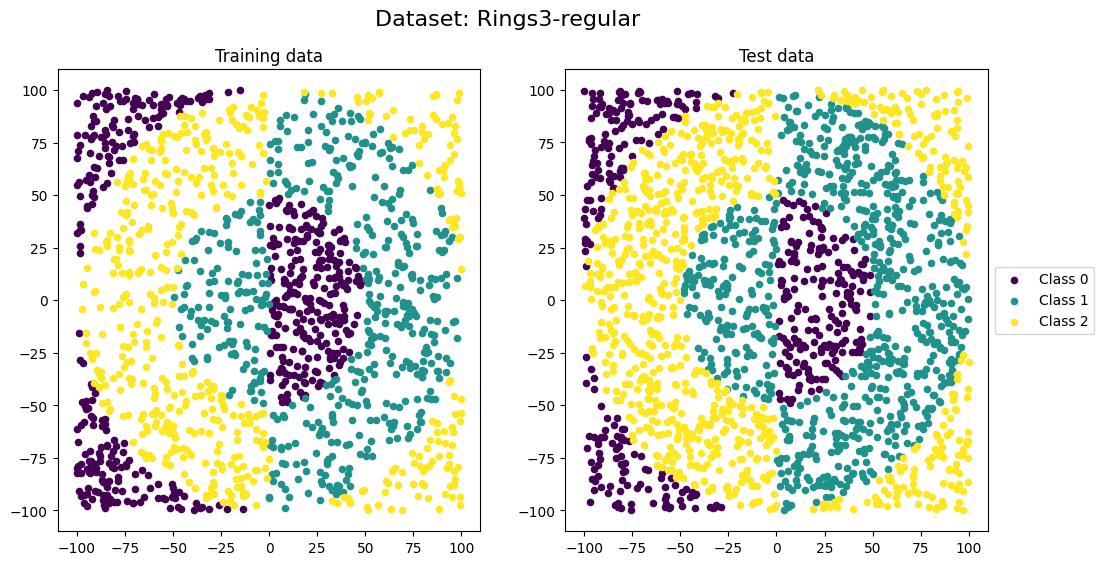

In [26]:
models[0].plot_classification_data()

### Model 1: `[80] - tanh`

In [27]:
model1 = models[0]
train_initialy(model1)

Training from age 0: (best_loss_test: inf, loss_test: 1.002309):   0%|          | 0/1000 [00:00<?, ?it/s]

Training from age 0: (best_loss_test: 0.573178, loss_test: 0.686675): 100%|██████████| 1000/1000 [00:08<00:00, 118.46it/s]


--------------------
Reverting to best model at age 945
Loss on train set: 0.54198	Loss on test set: 0.573178
--------------------
Model training finished at age 945 with loss 0.573178 on test set


Model: [80] - tanh
Age: 945
Train Loss: 0.54198
Test Loss: 0.573178
Accuracy: 0.7745
F1 Score: 0.7733
Model made 1549 / 2000 correct predictions on the test set.
There were 451 incorrect predictions.


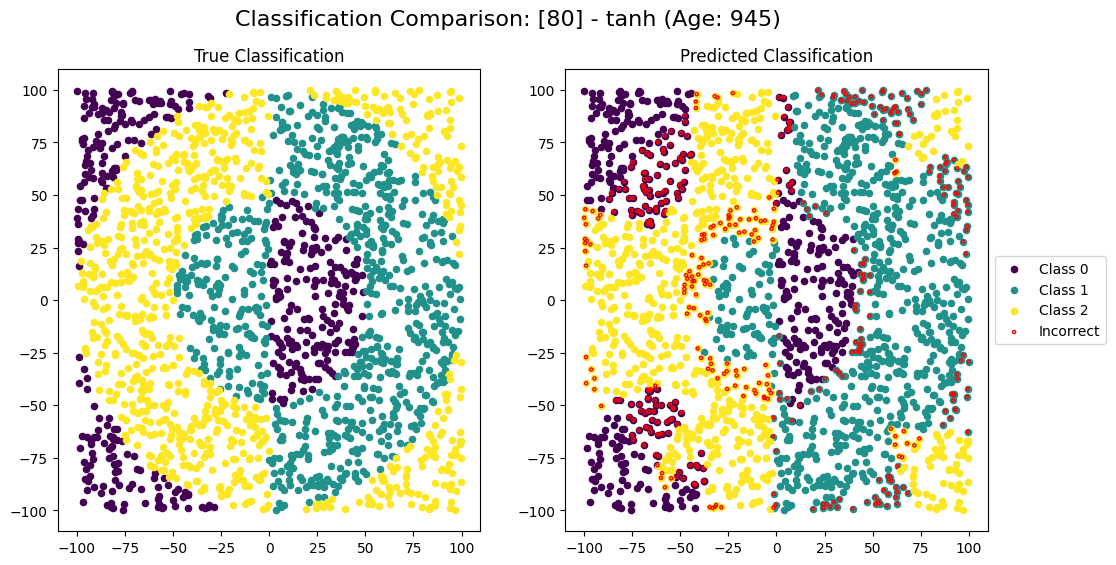

In [28]:
model1.plot_classification_comparison()

In [29]:
train_model(model1)

Training from age 945: (best_loss_test: 0.192787, loss_test: 0.216429): 100%|██████████| 1000/1000 [00:08<00:00, 112.37it/s]


--------------------
Reverting to best model at age 1943
Loss on train set: 0.162408	Loss on test set: 0.192787
--------------------
Model training finished at age 1943 with loss 0.192787 on test set


Training from age 1943: (best_loss_test: 0.128215, loss_test: 0.147834): 100%|██████████| 2000/2000 [00:18<00:00, 110.26it/s]


--------------------
Reverting to best model at age 3746
Loss on train set: 0.082544	Loss on test set: 0.128215
--------------------
Model training finished at age 3746 with loss 0.128215 on test set


Training from age 3746: (best_loss_test: 0.128215, loss_test: 0.167551): 100%|██████████| 1000/1000 [00:16<00:00, 61.07it/s]


--------------------
Reverting to best model at age 3746
Loss on train set: 0.082544	Loss on test set: 0.128215
--------------------
Model training finished at age 3746 with loss 0.128215 on test set


Training from age 3746: (best_loss_test: 0.122164, loss_test: 0.132334): 100%|██████████| 2000/2000 [00:16<00:00, 124.85it/s]


--------------------
Reverting to best model at age 5044
Loss on train set: 0.068492	Loss on test set: 0.122164
--------------------
Model training finished at age 5044 with loss 0.122164 on test set


Training from age 5044: (best_loss_test: 0.122164, loss_test: 0.167673): 100%|██████████| 1000/1000 [00:11<00:00, 88.64it/s]


--------------------
Reverting to best model at age 5044
Loss on train set: 0.068492	Loss on test set: 0.122164
--------------------
Model training finished at age 5044 with loss 0.122164 on test set


Training from age 5044: (best_loss_test: 0.122164, loss_test: 0.204999): 100%|██████████| 1000/1000 [00:16<00:00, 59.25it/s]

--------------------
Reverting to best model at age 5044
Loss on train set: 0.068492	Loss on test set: 0.122164
--------------------
Model training finished at age 5044 with loss 0.122164 on test set


Model: [80] - tanh
Age: 5044
Train Loss: 0.068492
Test Loss: 0.122164
Accuracy: 0.9475
F1 Score: 0.9476
Model made 1895 / 2000 correct predictions on the test set.
There were 105 incorrect predictions.


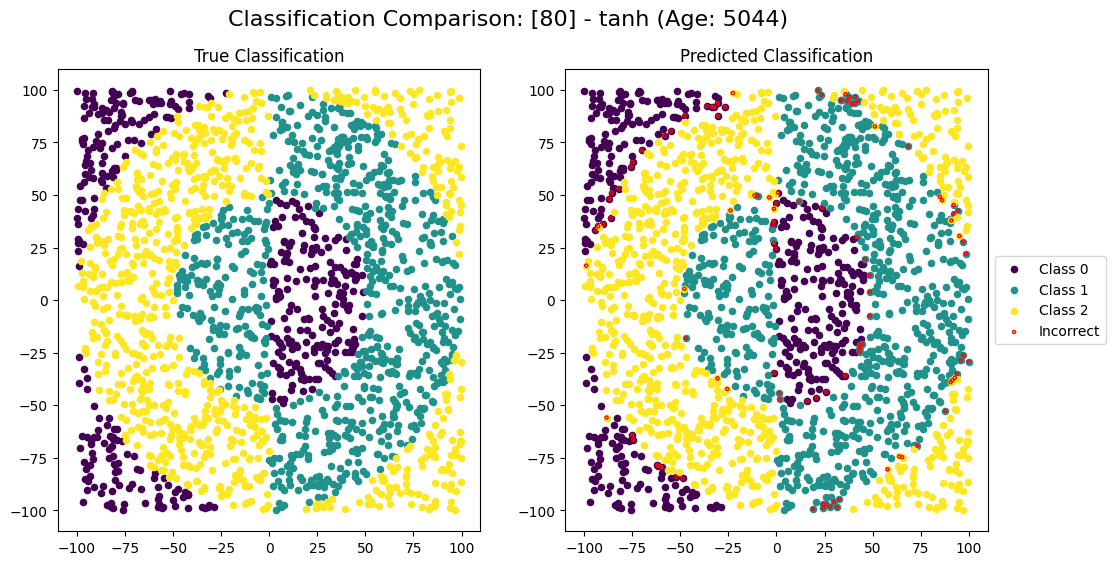

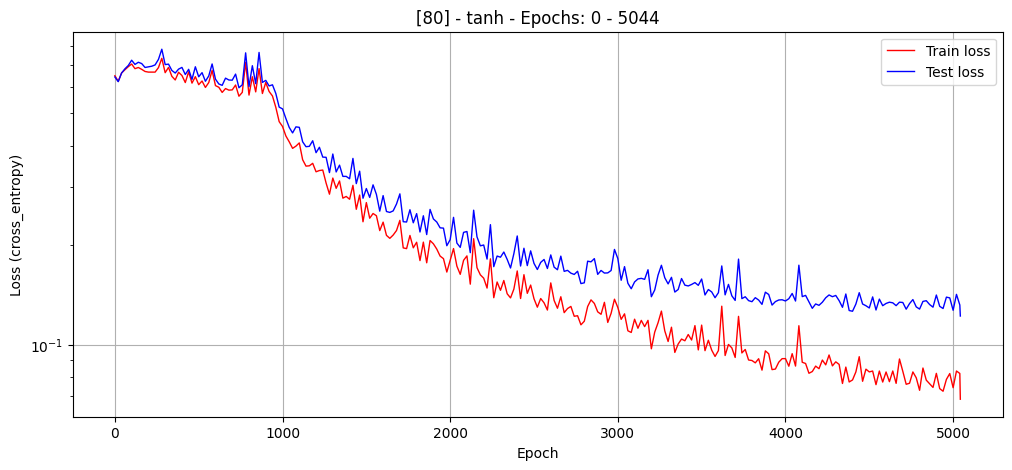

In [30]:
model1.plot_classification_comparison()
model1.plot_history(smoothing_interval=20)

### Model 2: `[40, 40] - tanh`

In [31]:
model2 = models[1]
train_initialy(model2)

Training from age 0: (best_loss_test: 0.540236, loss_test: 0.540236): 100%|██████████| 1000/1000 [00:07<00:00, 125.95it/s]

--------------------
Reverting to best model at age 999
Loss on train set: 0.497233	Loss on test set: 0.540236
--------------------
Model training finished at age 999 with loss 0.540236 on test set


Model: [40, 40] - tanh
Age: 999
Train Loss: 0.497233
Test Loss: 0.540236
Accuracy: 0.8045
F1 Score: 0.8043
Model made 1609 / 2000 correct predictions on the test set.
There were 391 incorrect predictions.


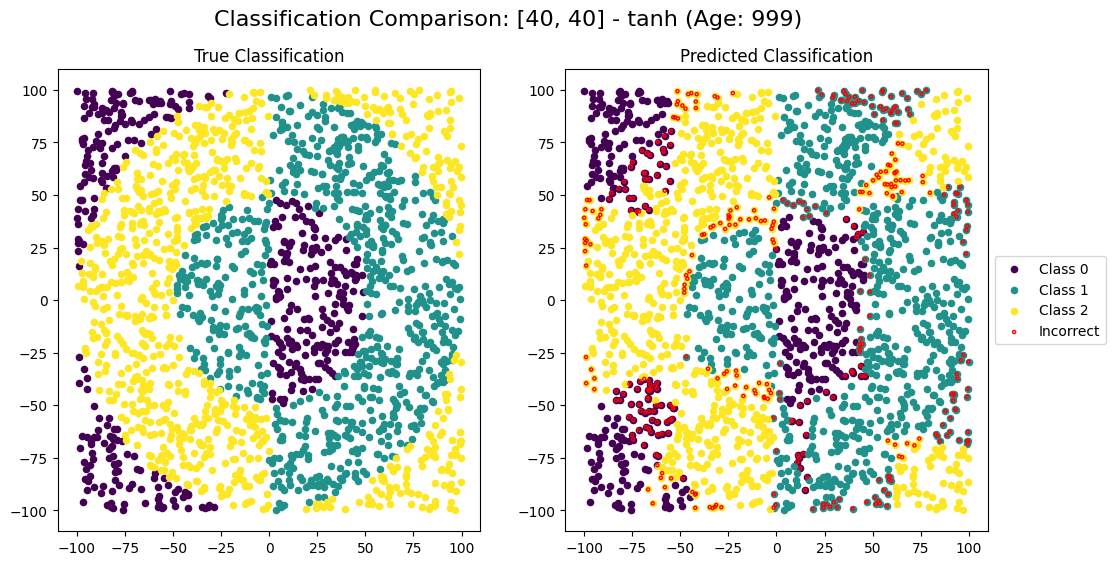

In [32]:
model2.plot_classification_comparison()

In [33]:
train_model(model2)

Training from age 999: (best_loss_test: 0.132297, loss_test: 0.155984): 100%|██████████| 1000/1000 [00:09<00:00, 110.71it/s]


--------------------
Reverting to best model at age 1997
Loss on train set: 0.076439	Loss on test set: 0.132297
--------------------
Model training finished at age 1997 with loss 0.132297 on test set


Training from age 1997: (best_loss_test: 0.125211, loss_test: 0.163435): 100%|██████████| 2000/2000 [00:18<00:00, 109.69it/s]


--------------------
Reverting to best model at age 2365
Loss on train set: 0.071704	Loss on test set: 0.125211
--------------------
Model training finished at age 2365 with loss 0.125211 on test set


Training from age 2365: (best_loss_test: 0.125211, loss_test: 0.186478): 100%|██████████| 1000/1000 [00:20<00:00, 47.66it/s]


--------------------
Reverting to best model at age 2365
Loss on train set: 0.071704	Loss on test set: 0.125211
--------------------
Model training finished at age 2365 with loss 0.125211 on test set


Training from age 2365: (best_loss_test: 0.124933, loss_test: 0.18198): 100%|██████████| 2000/2000 [00:15<00:00, 129.52it/s] 


--------------------
Reverting to best model at age 3162
Loss on train set: 0.06947	Loss on test set: 0.124933
--------------------
Model training finished at age 3162 with loss 0.124933 on test set


Training from age 3162: (best_loss_test: 0.124933, loss_test: 0.24218): 100%|██████████| 1000/1000 [00:12<00:00, 80.78it/s]


--------------------
Reverting to best model at age 3162
Loss on train set: 0.06947	Loss on test set: 0.124933
--------------------
Model training finished at age 3162 with loss 0.124933 on test set


Training from age 3162: (best_loss_test: 0.124933, loss_test: 0.200777): 100%|██████████| 1000/1000 [00:20<00:00, 47.77it/s]

--------------------
Reverting to best model at age 3162
Loss on train set: 0.06947	Loss on test set: 0.124933
--------------------
Model training finished at age 3162 with loss 0.124933 on test set


Model: [40, 40] - tanh
Age: 3162
Train Loss: 0.06947
Test Loss: 0.124933
Accuracy: 0.9475
F1 Score: 0.9475
Model made 1895 / 2000 correct predictions on the test set.
There were 105 incorrect predictions.


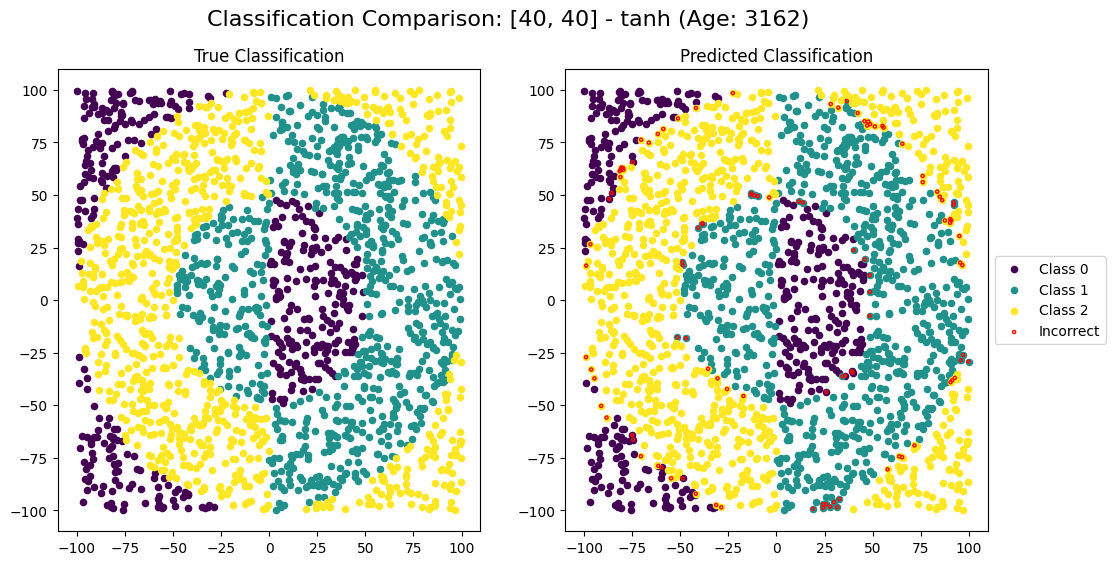

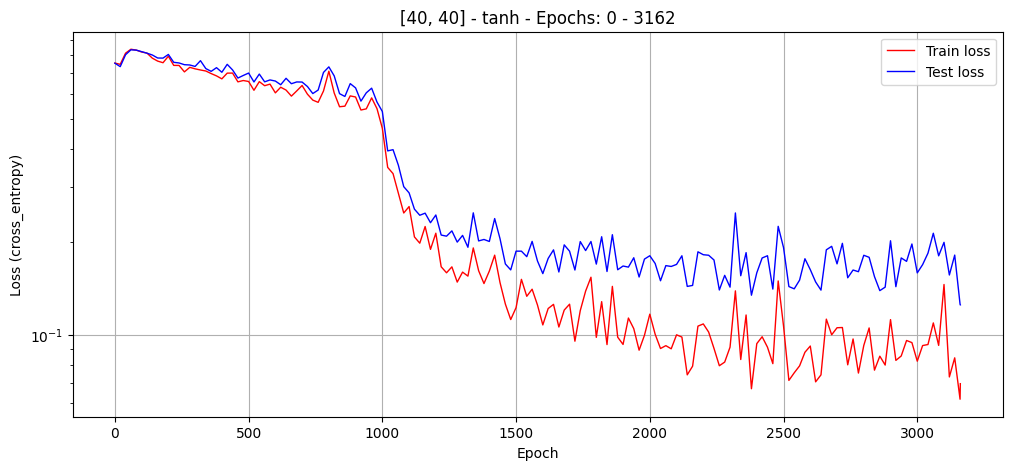

In [34]:
model2.plot_classification_comparison()
model2.plot_history(smoothing_interval=20)

### Model 3: `[20, 40, 20] - sigmoid`

In [35]:
model3 = models[2]
train_initialy(model3)

Training from age 0: (best_loss_test: 0.520252, loss_test: 0.560339): 100%|██████████| 1000/1000 [00:09<00:00, 102.70it/s]

--------------------
Reverting to best model at age 906
Loss on train set: 0.499739	Loss on test set: 0.520252
--------------------
Model training finished at age 906 with loss 0.520252 on test set


Model: [20, 40, 20] - sigmoid
Age: 906
Train Loss: 0.499739
Test Loss: 0.520252
Accuracy: 0.797
F1 Score: 0.7967
Model made 1594 / 2000 correct predictions on the test set.
There were 406 incorrect predictions.


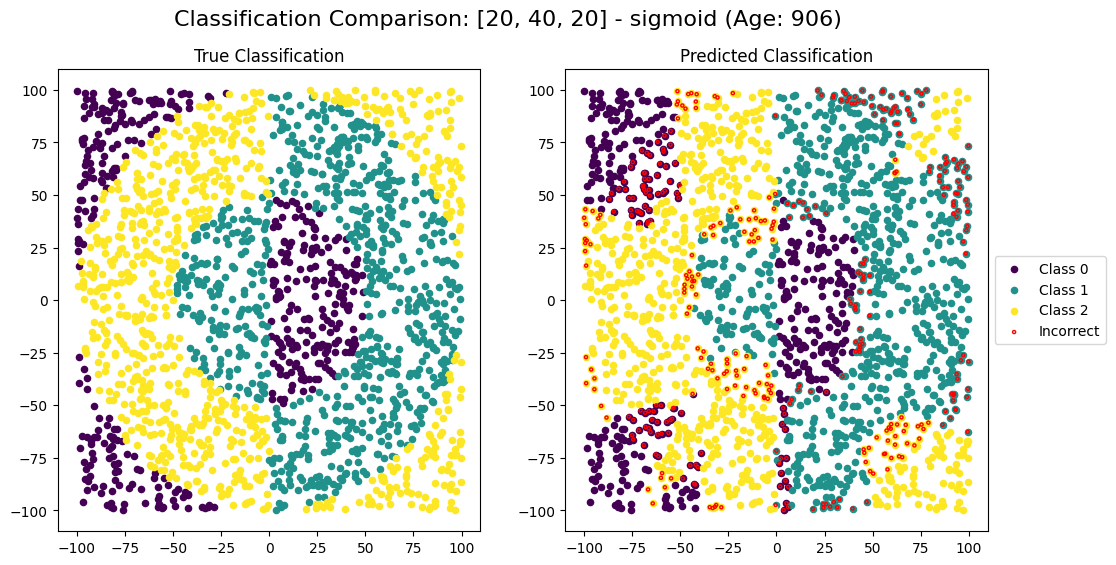

In [36]:
model3.plot_classification_comparison()

In [37]:
train_model(model3)

Training from age 906: (best_loss_test: 0.129801, loss_test: 0.219986): 100%|██████████| 1000/1000 [00:11<00:00, 88.77it/s]


--------------------
Reverting to best model at age 1824
Loss on train set: 0.099968	Loss on test set: 0.129801
--------------------
Model training finished at age 1824 with loss 0.129801 on test set


Training from age 1824: (best_loss_test: 0.122443, loss_test: 0.194526): 100%|██████████| 2000/2000 [00:22<00:00, 89.25it/s]


--------------------
Reverting to best model at age 3663
Loss on train set: 0.077922	Loss on test set: 0.122443
--------------------
Model training finished at age 3663 with loss 0.122443 on test set


Training from age 3663: (best_loss_test: 0.122443, loss_test: 0.18105): 100%|██████████| 1000/1000 [00:26<00:00, 38.10it/s]


--------------------
Reverting to best model at age 3663
Loss on train set: 0.077922	Loss on test set: 0.122443
--------------------
Model training finished at age 3663 with loss 0.122443 on test set


Training from age 3663: (best_loss_test: 0.120444, loss_test: 0.209568): 100%|██████████| 2000/2000 [00:18<00:00, 107.99it/s]


--------------------
Reverting to best model at age 4059
Loss on train set: 0.080453	Loss on test set: 0.120444
--------------------
Model training finished at age 4059 with loss 0.120444 on test set


Training from age 4059: (best_loss_test: 0.120444, loss_test: 0.229909): 100%|██████████| 1000/1000 [00:14<00:00, 68.16it/s]


--------------------
Reverting to best model at age 4059
Loss on train set: 0.080453	Loss on test set: 0.120444
--------------------
Model training finished at age 4059 with loss 0.120444 on test set


Training from age 4059: (best_loss_test: 0.120444, loss_test: 0.205001): 100%|██████████| 1000/1000 [00:25<00:00, 38.81it/s]

--------------------
Reverting to best model at age 4059
Loss on train set: 0.080453	Loss on test set: 0.120444
--------------------
Model training finished at age 4059 with loss 0.120444 on test set


Model: [20, 40, 20] - sigmoid
Age: 4059
Train Loss: 0.080453
Test Loss: 0.120444
Accuracy: 0.9495
F1 Score: 0.9495
Model made 1899 / 2000 correct predictions on the test set.
There were 101 incorrect predictions.


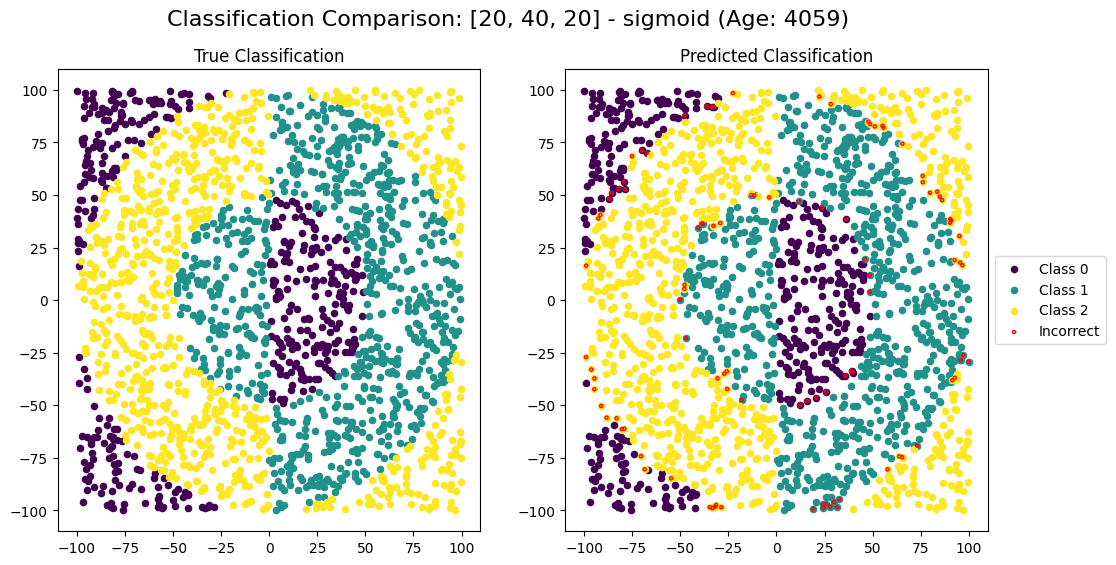

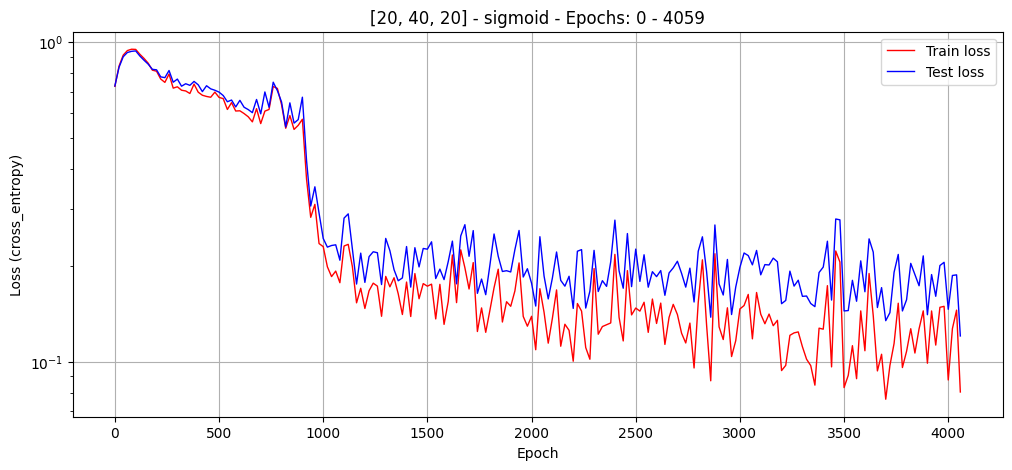

In [38]:
model3.plot_classification_comparison()
model3.plot_history(smoothing_interval=20)

# Conlcusions

Alle 3 models
- `[80] - tanh`
- `[40, 40] - tanh`
- `[20, 40, 20] - sigmoid`

showed undistingushible performance on rings3-regular dataset. All achieved ~0.95 F1-score after 3000-5000 epochs. Most of the latter training did not bring any more improvement